In [1]:
import matplotlib.pyplot as plt
import numpy as np
from src.options import Colors, Linestyles
from src.aux_function import *
import json
from pprint import pprint

fontSize = 15 # 22 generates the font more like the latex text
save_fig = True

### Experimento baab

#### Determine the difference in percetage (graph discarted)

No handles with labels found to put in legend.


[58.42965603621608, 16.397913843956687, 9.355248875063884, 4.0607688352241125, 2.7568090617934593, 1.5732178615302954, 1.4592196983731307, 0.9483193034430168, 0.2231379728253484, 0.6138254046085576, 0.6131407464235319, 0.3961640850497841, 0.5594303331905149, 0.35956843000948685, 0.24525111037505357, 0.20611118484963298, 0.12451785276853568, 0.1485836415579322, 0.30046819939036606, 0.10084873977072425, 0.18550228285917306, 0.08780057801018817, 0.15783840411352995, 0.04671627299887567, 0.15706218202221972, 0.09201381237868653, 0.05800904775700428, 0.05416537251644768, 0.05829758931079164, 0.004065572777252515, 0.09200159895515982, 0.04430618123387959, 0.07164894709715144, 0.03227518619517349, 0.05042298546019354, 0.04408924531779215, 0.04956644296444782]


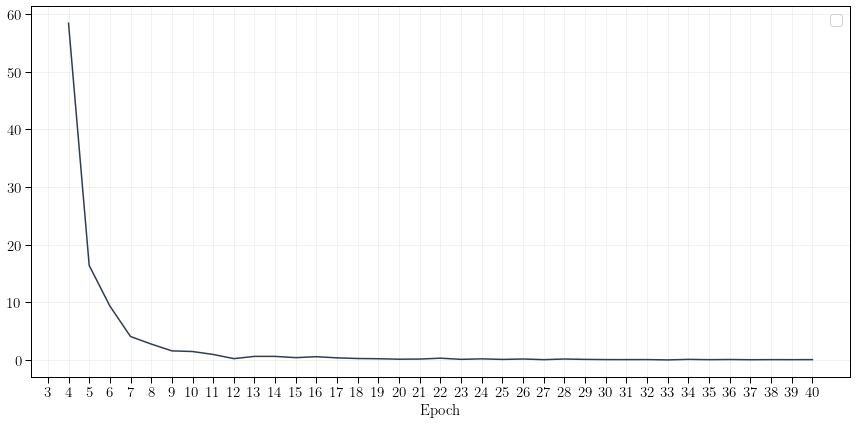

In [62]:
# ESTA GRAFICA QUEDA DESCARTADA

# determine the difference in percentaje of learning for each epoch in disc loss
outputs = json.load(open('outputs/baab.json'))

show_legend = True
colors = [Colors.random_color() for _ in range(10)]

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
# ax.set_title(r'(baac) Val loss ', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
# ax.set_ylabel(r'SSIM', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')


i = 0
disc_loss_mean = []
for exp in outputs.keys():
    disc_loss = []
    # get vector for loss 
    for epoch in outputs[exp].keys():
        disc_loss.append(outputs[exp][epoch]['disc_loss'])
    disc_loss_mean.append(disc_loss)

n_eps= 2
disc_loss_mean = np.mean(np.array(disc_loss_mean), axis=0)[n_eps:]
x = range(n_eps + 1, 41)
disc_loss_mean = disc_loss_mean + np.abs(np.min(disc_loss_mean))

# Plotting 
# ax.plot(x, disc_loss_mean)

difference = []
for ep, loss in enumerate(disc_loss_mean):
    ep += 2
    if ep == 2:
        aux = loss
        last_loss = loss
    else:
        difference.append( np.abs(last_loss - loss)/np.abs(aux)*100    )
        last_loss = loss

print(difference)
ax.plot(x[1:], difference, color=colors[i])

plt.xticks(x)

# Text over plots
show_legend = True
if show_legend:
    ax.legend(shadow=False, loc=1, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
save_fig = False
if save_fig:
    fig.tight_layout() 
    fig.savefig('./figures/gan_plot24_validation_loss_for_each_epoch_filtered_best_exps.pdf')
    
plt.tight_layout()
plt.show()


#### Get models that best minimize wgan loss at epoch 20

In [80]:
outputs = json.load(open('outputs/baab.json'))

disc_losses = []
for exp in outputs.keys():
    disc_loss = []
    for epoch in outputs[exp].keys():
        disc_loss.append(outputs[exp][epoch]['disc_loss'])
        
    disc_losses.append(disc_loss)

disc_losses = np.array(disc_losses)
print(disc_losses.shape)
losses_ep20 = disc_losses[:, 19]
best_exps = np.argsort(np.abs(losses_ep20)) + 1
print('Ordered exps that best minimize wgan loss: ', best_exps)

(10, 40)
Ordered exps that best minimize wgan loss:  [ 6  5  3  2  7  9  1  8 10  4]


['baab6', 'baab5', 'baab3']


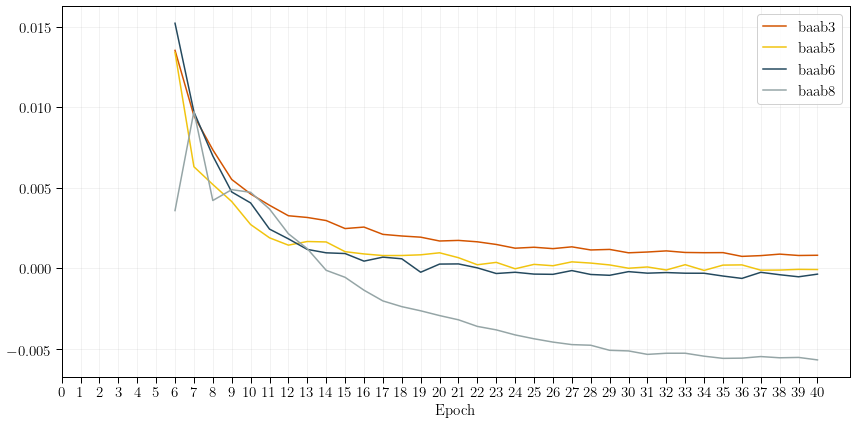

In [96]:
# plot the best 3 in wgan loss
outputs = json.load(open('outputs/baab.json'))

show_legend = True
colors = [Colors.random_color() for _ in range(10)]

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
# ax.set_title(r'(baac) Val loss ', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
# ax.set_ylabel(r'SSIM', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

losses_ep20 = disc_losses[:, 19]
best_exps = np.argsort(np.abs(losses_ep20)) + 1
best_exps = [f'baab{exp_num}' for exp_num in best_exps][:3]
print(best_exps)
# Plotting 
x = range(0, 41)
i = 0
for exp in outputs.keys():
    disc_loss = []
    for epoch in outputs[exp].keys():
        disc_loss.append(outputs[exp][epoch]['disc_loss'])
    if exp in best_exps or exp == 'baab8':
        ax.plot(x[6:], disc_loss[5:], color=colors[i], label=exp)
    i += 1

plt.xticks(x)

# Text over plots
show_legend = True
if show_legend:
    ax.legend(shadow=False, loc=1, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
save_fig = False
if save_fig:
    fig.tight_layout() 
    fig.savefig('./figures/nones.pdf')
    
plt.tight_layout()
plt.show()

['baab6', 'baab5', 'baab3']


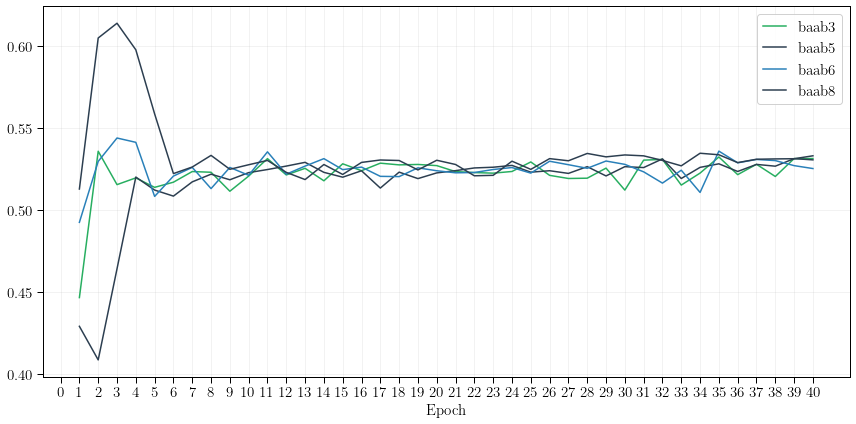

In [95]:
# plot ssim of the best 3 in wgan loss
outputs = json.load(open('outputs/baab.json'))

show_legend = True
# colors = [Colors.random_color() for _ in range(10)]

# Enable latex text edit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_subplot(1, 1, 1)

# Labels and Title
# ax.set_title(r'(baac) Val loss ', fontsize=fontSize)
ax.set_xlabel(r'Epoch', fontsize=fontSize)
# ax.set_ylabel(r'SSIM', fontsize=fontSize)


# Tick size
ax.xaxis.set_tick_params(labelsize=fontSize)
ax.yaxis.set_tick_params(labelsize=fontSize)  
ax.grid(alpha=.2)

# Thicknes and axis colors
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.0)
ax.tick_params(direction='out', length=6, width=1, colors='k')

losses_ep20 = disc_losses[:, 19]
best_exps = np.argsort(np.abs(losses_ep20)) + 1
best_exps = [f'baab{exp_num}' for exp_num in best_exps][:3]
print(best_exps)
# Plotting 
x = range(0, 41)
i = 0
for exp in outputs.keys():
    ssim_loss = []
    for epoch in outputs[exp].keys():
        ssim_loss.append(outputs[exp][epoch]['val_loss'])
    if exp in best_exps or exp == 'baab8':
        ax.plot(x[1:], ssim_loss[0:], color=colors[i], label=exp)
    i += 1

plt.xticks(x)

# Text over plots
show_legend = True
if show_legend:
    ax.legend(shadow=False, loc=1, handlelength=1.5,
            fontsize=fontSize, framealpha=0.9)

# Save figure as PDF
save_fig = False
if save_fig:
    fig.tight_layout() 
    fig.savefig('./figures/nones.pdf')
    
plt.tight_layout()
plt.show()

#### otro2